In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_one = pd.read_excel("C:/Users/Danielle/Documents/GitHub/PracticeMakesPerfect/Week_9/imputation_homework_12.xls")
data_two = pd.read_excel("C:/Users/Danielle/Documents/GitHub/PracticeMakesPerfect/Week_9/imputation_homework_32.xlsx")
data_three = pd.read_excel("C:/Users/Danielle/Documents/GitHub/PracticeMakesPerfect/Week_9/imputation_homework_87.xlsx")

In [2]:
#From here to the next comment, all work will represent data_one, corresponding to imputation_homework_12.xls
all_nulls = data_one.isnull().sum().sum()
column_nulls = data_one.isnull().sum()
print(all_nulls, column_nulls)

48 Unnamed: 0     0
time           0
value         48
dtype: int64


Text(0.5, 1.0, 'Histogram of Values (without interpolation)')

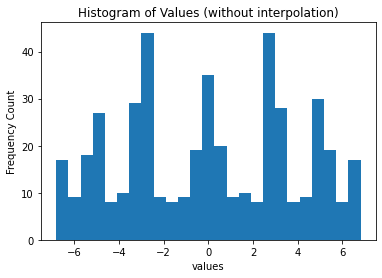

In [3]:
plt.hist(data_one['value'], bins = 25)
plt.xlabel('values') 
plt.ylabel('Frequency Count') 
plt.title('Histogram of Values (without interpolation)')

Text(0.5, 1.0, 'Lag Plot')

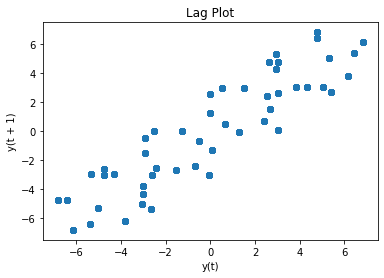

In [4]:
data_one_lag_plot = pd.plotting.lag_plot(pd.Series(data_one['value']))
data_one_lag_plot.set_title('Lag Plot')

Yes, based upon this lag plot, the order of this data matters. Linear regression could be completed on this plot with a relatively small squared error and confidence interval.

In [5]:
interpolated_values_series = (data_one['value']).interpolate(method = 'linear', order = 1)
data_one_values_array = data_one['value'].to_numpy()
data_one_interpolated_values_array = interpolated_values_series.to_numpy()
print(data_one_interpolated_values_array[:11])

[0.         2.5287792  2.41901994 0.66505226 0.50665534 2.93892626
 5.32484856 5.02813672 3.04606912 3.90067585 4.75528258]


Text(0.5, 1.0, 'Scatter Plot (interpolated)')

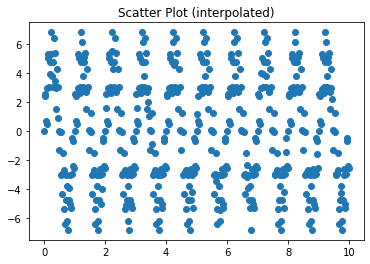

In [6]:
plt.scatter(data_one['time'], data_one_interpolated_values_array)
plt.title('Scatter Plot (interpolated)')

In [7]:
#From here to the next comment, all work will represent data_two, corresponding to imputation_homework_32.xlsx
all_nulls = data_two.isnull().sum().sum()
column_nulls = data_two.isnull().sum()
print(all_nulls, column_nulls)

9 Unnamed: 0    0
 x            9
y             0
dtype: int64


Text(0.5, 1.0, 'Histogram of X Values (without interpolation')

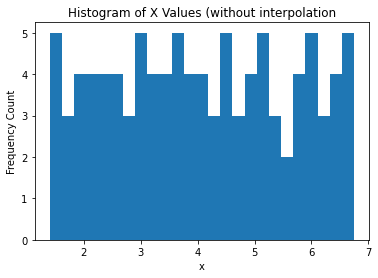

In [8]:
plt.hist(data_two[' x'], bins = 25)
plt.xlabel('x') 
plt.ylabel('Frequency Count') 
plt.title('Histogram of X Values (without interpolation')

Text(0.5, 1.0, 'Lag Plot')

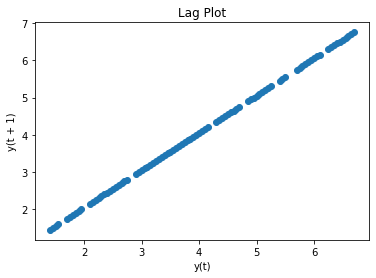

In [9]:
data_two_lag_plot = pd.plotting.lag_plot(pd.Series(data_two[' x']))
data_two_lag_plot.set_title('Lag Plot')

Yes, based upon this lag plot, the order of this data matters. Linear regression could be completed on this plot with an extremely small squared error and confidence interval.

s = data_two[[' x']]
values_name_2 = s.squeeze()
data_two_lag_plot = pd.plotting.lag_plot(pd.Series(values_name_2))
data_two_lag_plot.set_title('Lag Plot')

In [10]:
interpolated_values_series_2 = (data_two[' x']).interpolate(method = 'linear', order = 1)
data_two_x_array = data_two[' x'].to_numpy()
data_two_interpolated_x_array = interpolated_values_series_2.to_numpy()
print(data_two_interpolated_x_array[:8]) #Sanity check

[1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75]


Text(0.5, 1.0, 'Scatter Plot (interpolated)')

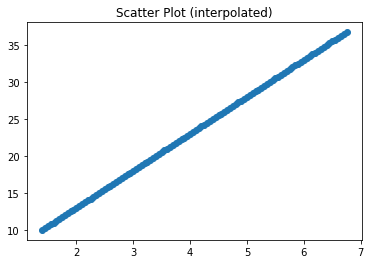

In [11]:
plt.scatter(data_two_interpolated_x_array, data_two['y'])
plt.title('Scatter Plot (interpolated)')

In [12]:
#From here to the next comment, all work will represent data_three, corresponding to imputation_homework_87.xlsx
all_nulls = data_three.isnull().sum().sum()
column_nulls = data_three.isnull().sum()
print(all_nulls, column_nulls)

81 Unnamed: 0     0
date           0
value         81
dtype: int64


Text(0.5, 1.0, 'Histogram of Values (without interpolation')

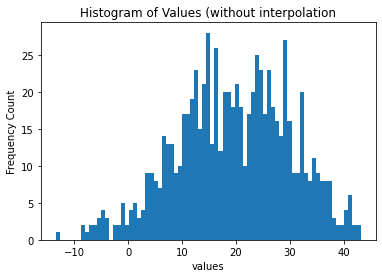

In [13]:
plt.hist(data_three['value'], bins = 75)
plt.xlabel('values') 
plt.ylabel('Frequency Count') 
plt.title('Histogram of Values (without interpolation')

Text(0.5, 1.0, 'Lag Plot')

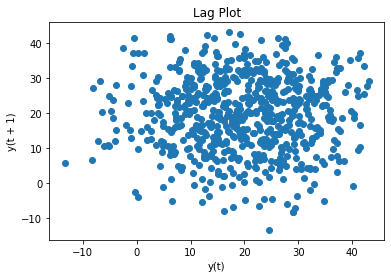

In [14]:
data_three_lag_plot = pd.plotting.lag_plot(pd.Series(data_three['value']))
data_three_lag_plot.set_title('Lag Plot')

No, based upon this lag plot, the order of this data does not appear to matter. Linear regression likely cannot be completed on this plot, as the squared error would be too large to allow for a small enough p value.

In [16]:
(data_three['value']).apply(lambda x: np.where(x.isnull(), x.dropna().sample(len(x), replace=True), x))

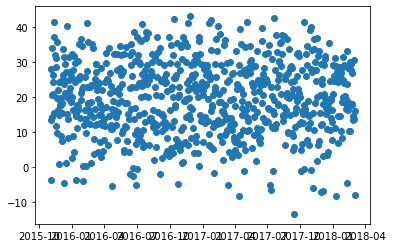

In [17]:
plt.scatter(data_three['date'], data_three['value'])